# Plot the waveforms of possible cracking events recorded on hydrophones

In [16]:
# Imports
from utils_basic import ROOTDIR_HYDRO as rootdir
from utils_basic import freq2suffix, get_hydrophone_coords, norm2suffix, time2suffix
from utils_preproc import read_and_process_windowed_hydro_waveforms
from utils_plot import freq_band_to_label, plot_windowed_hydro_waveforms, save_figure


In [17]:
# Inputs
## Data
station = "A00"
starttime = "2019-05-01T08:45:40Z"
locations_to_plot = ["03", "04", "05", "06"]
duration = 3.0 # duration in seconds
major_time_spacing = 2.0 # in seconds
minor_time_spacing = 0.2 # in seconds

## Preprocessing
freqmin = None
freqmax = 10.0

## Plotting
depth_lim = (140, 430)
normalize = True
scale = 35.0



In [18]:
# Read and preprocess the data
sta_df = get_hydrophone_coords()
stream = read_and_process_windowed_hydro_waveforms(starttime, duration, 
                                                   stations = station, freqmin = freqmin, freqmax = freqmax)

Text(0.5, 0.92, 'Lowpass 10.0 Hz')

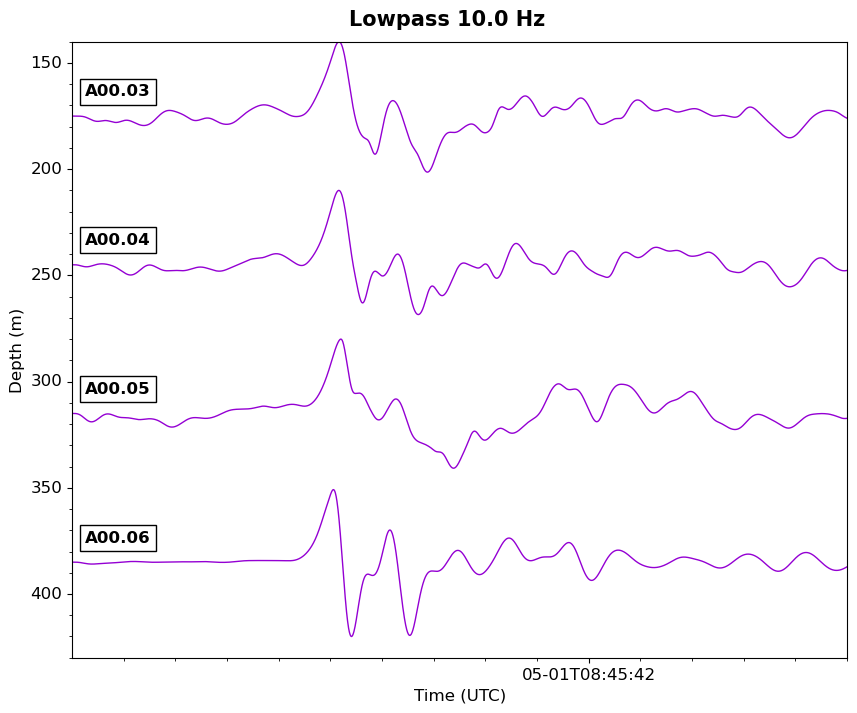

In [19]:
# Plotting
fig, axes = plot_windowed_hydro_waveforms(stream, sta_df,
                                          depth_lim = depth_lim, station_to_plot=station, locations_to_plot=locations_to_plot, scale=scale, major_time_spacing=major_time_spacing, minor_time_spacing=minor_time_spacing, normalize=normalize)

title_filt = freq_band_to_label(freqmin, freqmax)
fig.suptitle(title_filt, fontsize=15, fontweight="bold", y=0.92)

In [20]:
# Save the figure
time_suffix = time2suffix(starttime)
freq_suffix = freq2suffix(freqmin, freqmax)
norm_suffix= norm2suffix(normalize)
figname = f"cracking_event_on_hydro_{station}_{time_suffix}_{freq_suffix}_{norm_suffix}.png"

save_figure(fig, figname, outdir = rootdir)

Figure saved to /Volumes/OmanData/data/hydrophones/cracking_event_on_hydro_A00_20190501T084540_lp10hz_normalized.png
